# Tarea Semanal 14

# Analitico
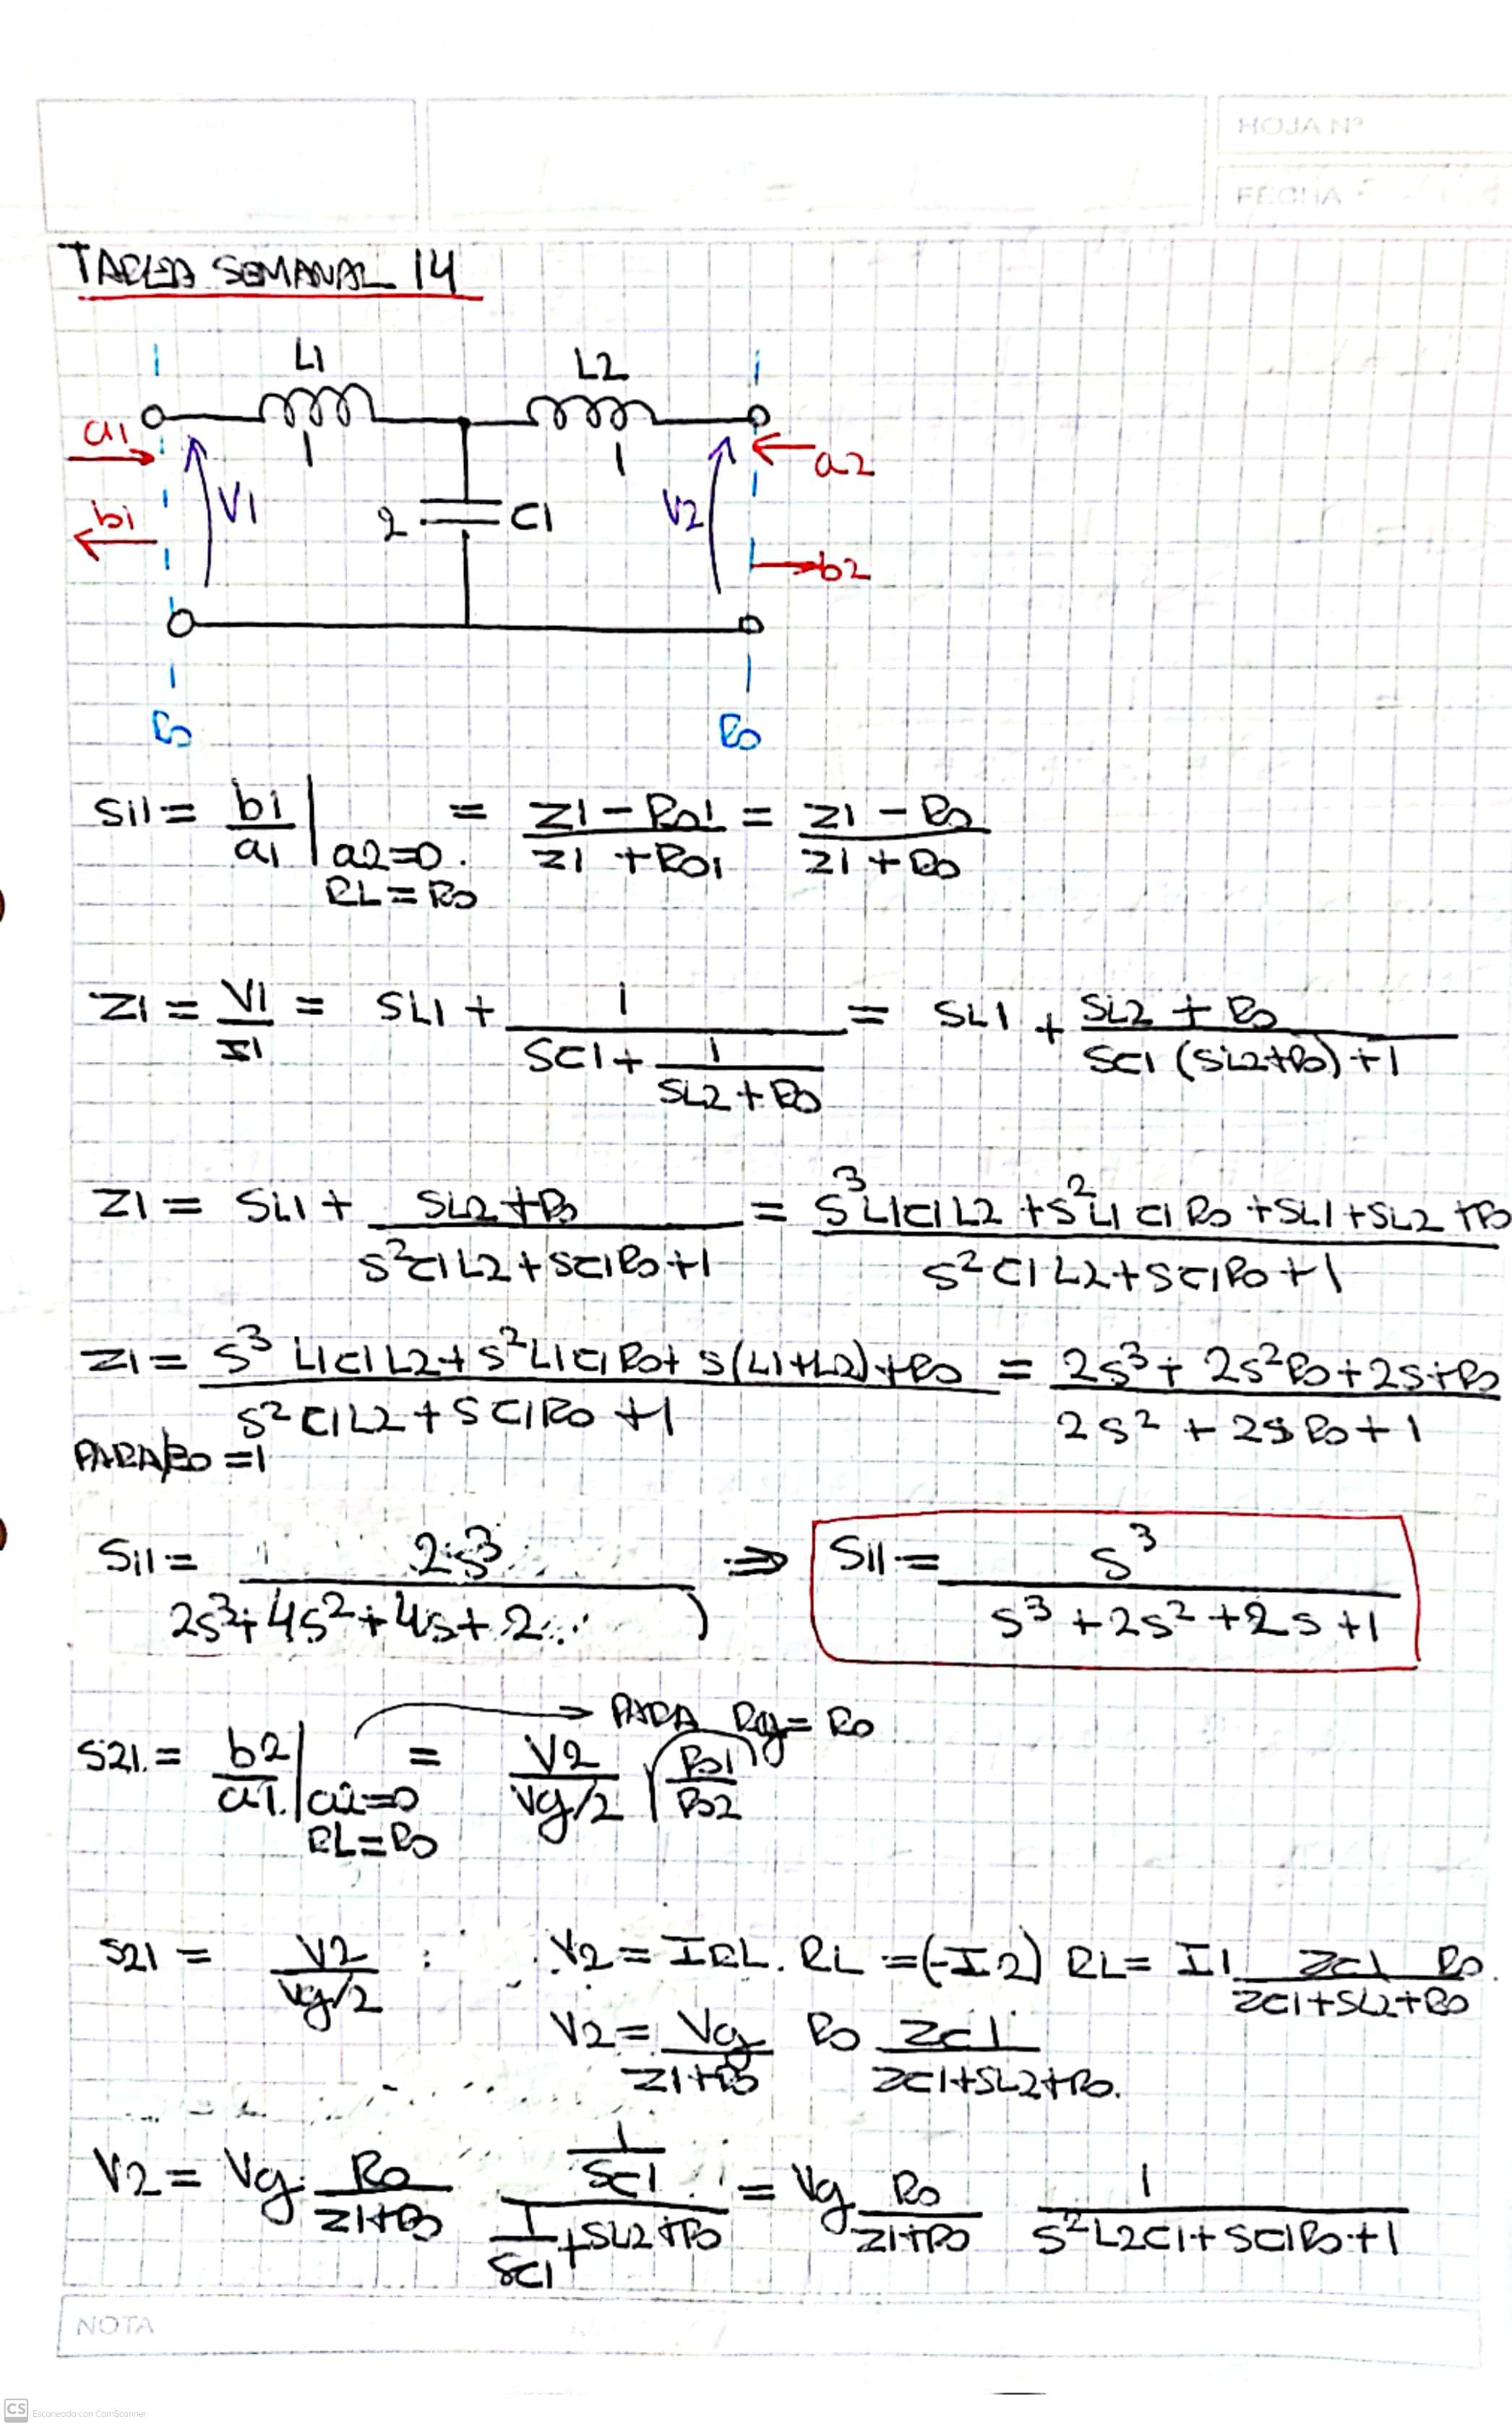

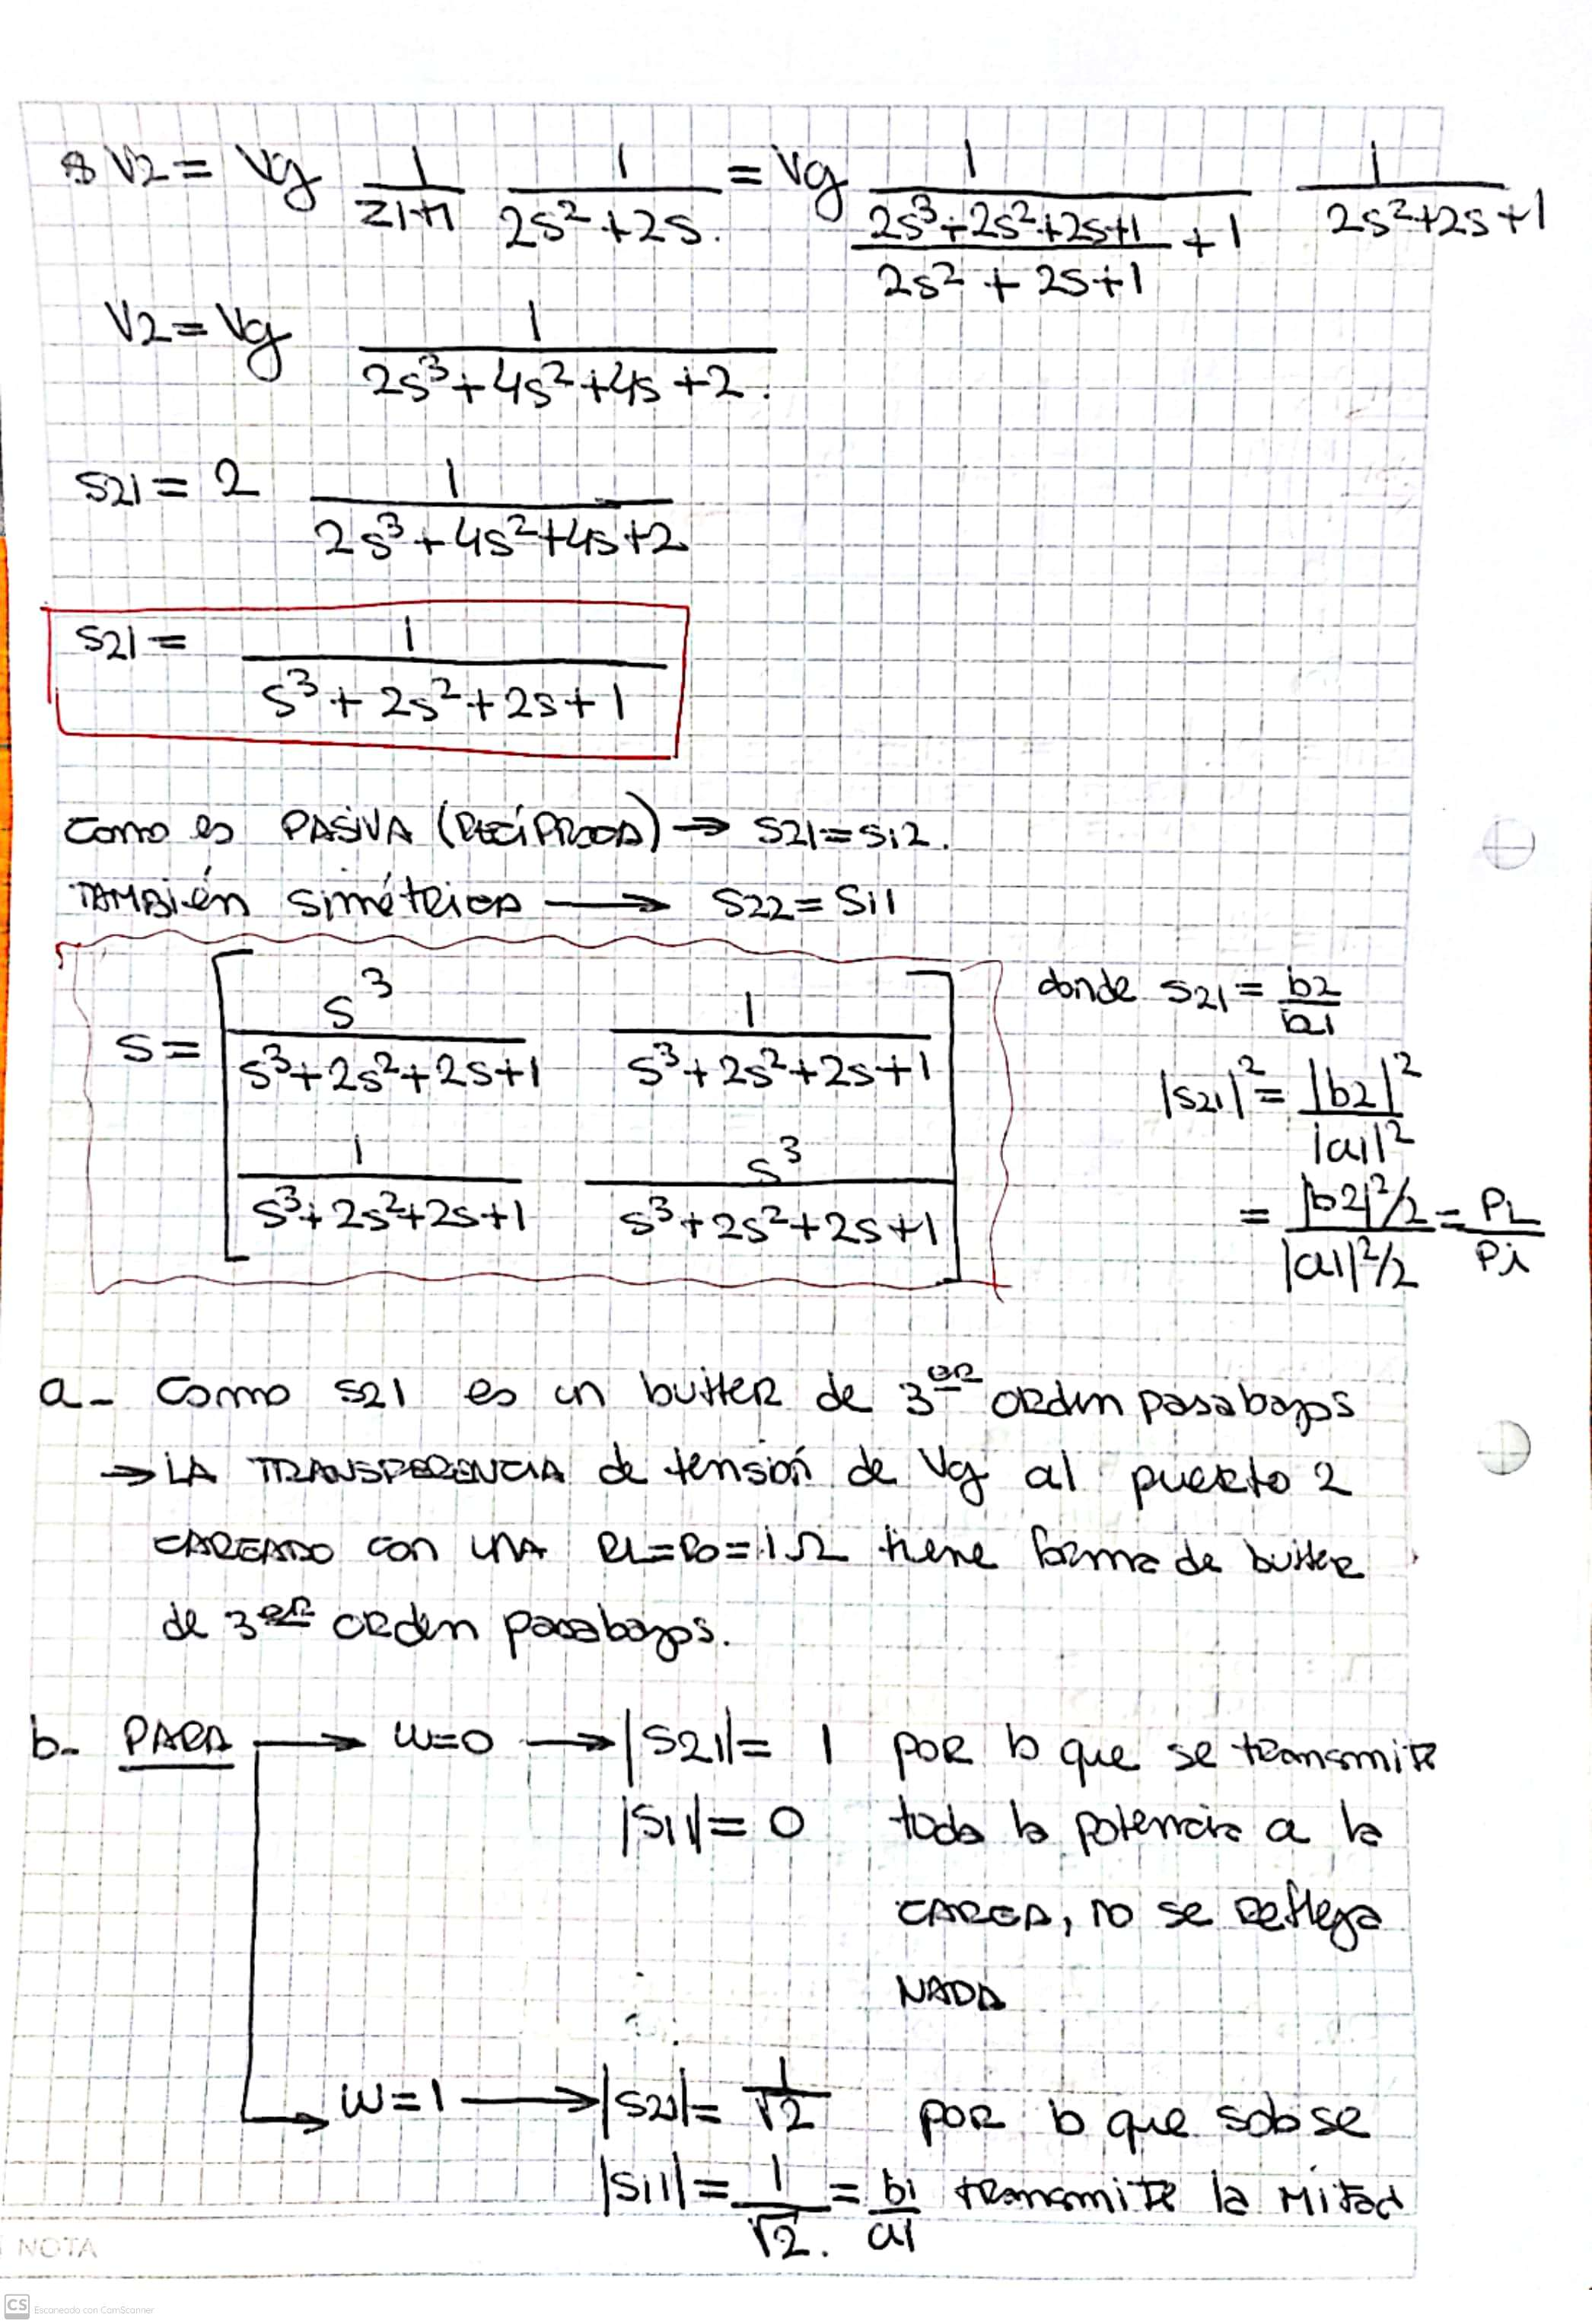

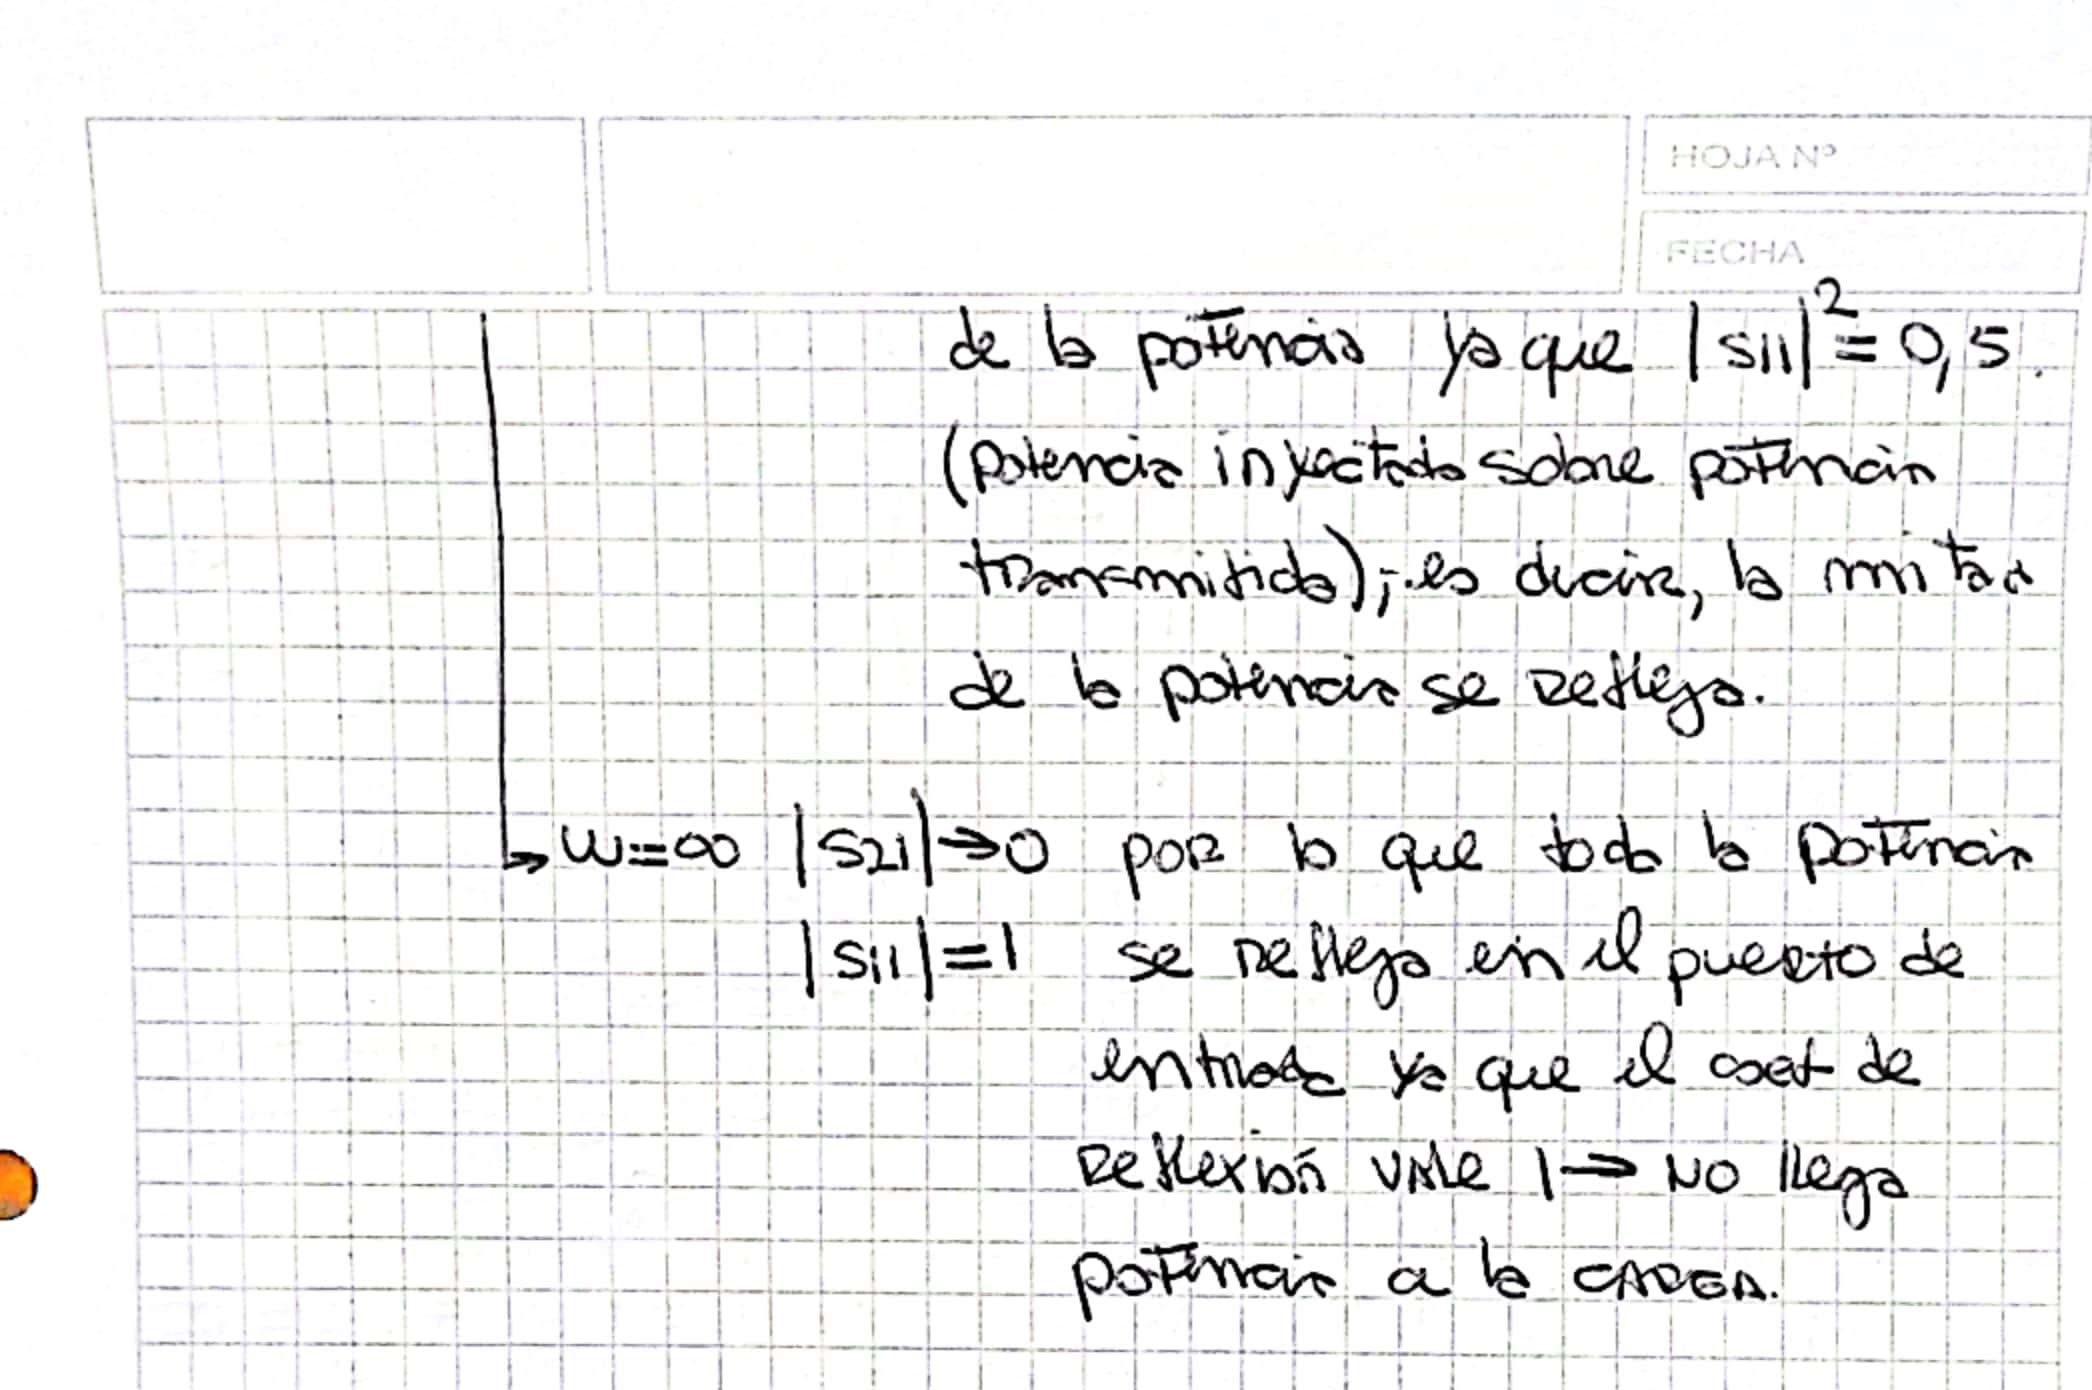

# Simulacion

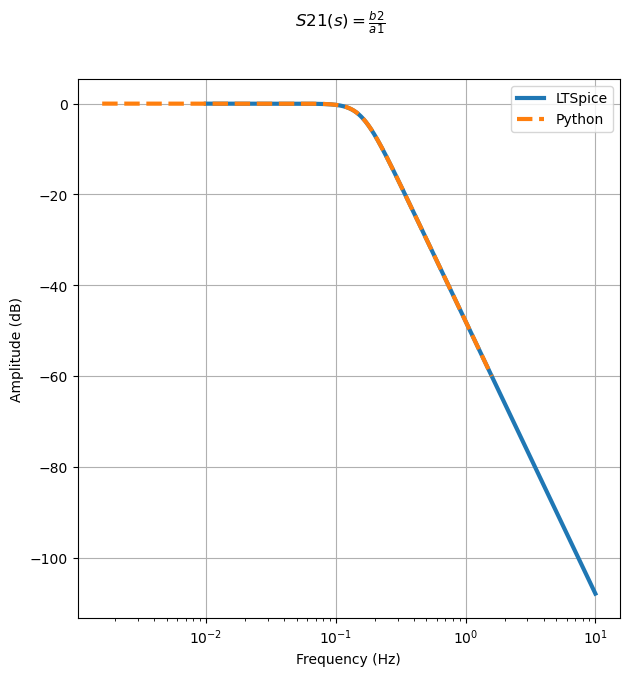

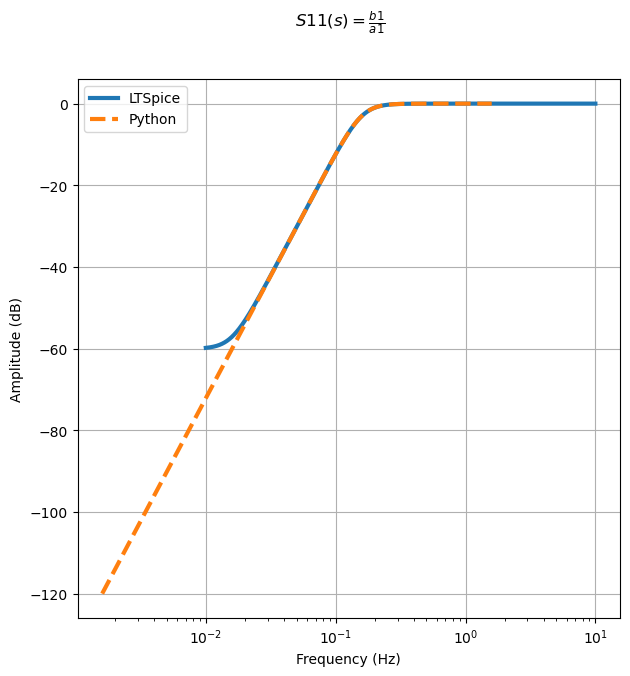

In [13]:
import ltspice

import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig

l = ltspice.Ltspice('TS14.raw')
l.parse()

freq = l.get_frequency()
S21_lt =l.get_data('S21(V1)')

plt.close('all')

fig, ax = plt.subplots(1, 1, figsize=(7,7))
fig.suptitle(r'$S21(s) =\frac{b2}{a1}$')

ax.semilogx(freq, 20 * np.log10(np.abs(S21_lt)), label='LTSpice',linewidth=3)
ax.grid()
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("Amplitude (dB)")

num = np.array([1])
den = np.array([1,2,2,1])

w,S21 = sig.freqs(num,den,10000)

ax.semilogx(w/(2*np.pi),20*np.log10(np.abs(S21)),label='Python',ls='--',linewidth=3)

plt.legend()
plt.show()

S11_lt =l.get_data('S11(V1)')

plt.close('all')

fig, ax = plt.subplots(1, 1, figsize=(7,7))
fig.suptitle(r'$S11(s) =\frac{b1}{a1}$')

ax.semilogx(freq, 20 * np.log10(np.abs(S11_lt)), label='LTSpice',linewidth=3)
ax.grid()
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("Amplitude (dB)")

num = np.array([1,0,0,0])
den = np.array([1,2,2,1])

w,S11 = sig.freqs(num,den,10000)

ax.semilogx(w/(2*np.pi),20*np.log10(np.abs(S11)),label='Python',ls='--',linewidth=3)

plt.legend()
plt.show()



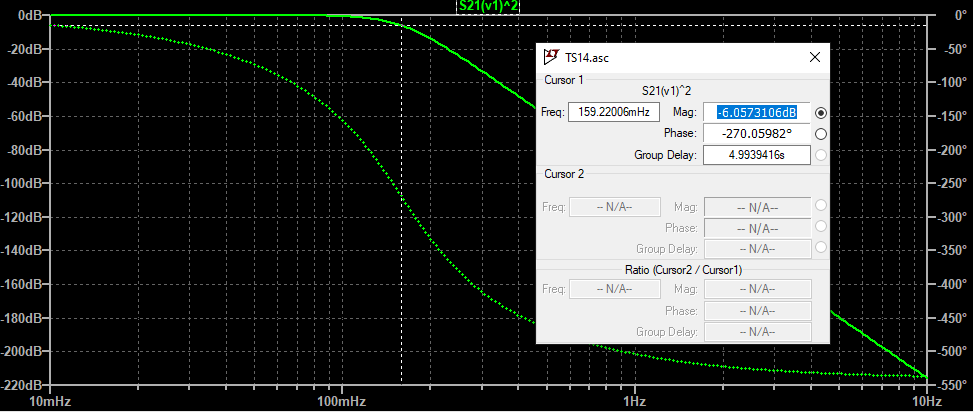

Se observa que la potencia transmitida al puerto 2 en $w=1 \frac{rad}{s}$ , $|S21|^2 = \frac{|b2|^2}{|a1|^2}$, es -6dB menos que la potencia inyectada por el generador. Esto se debe a que el coeficiente de reflexion en el puerto 1,  $|S11| = \frac{|b1|}{|a1|1}$, vale 0.5, es decir, la potencia inyectada por el generador, se refleja un 50% en el puerto 1.

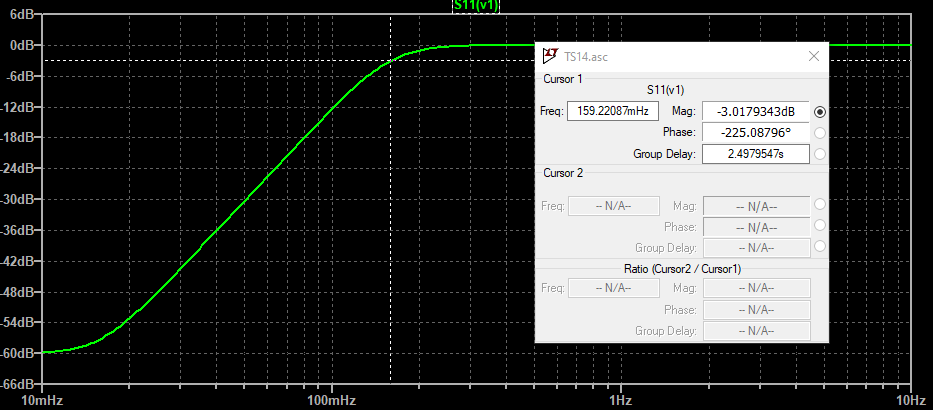


Para $w=0 \frac{rad}{s}$ la potencia inyectada por el generador es transmitida totalmente al puerto 2 $|S21|^2 =1$, ya que el coficiente de reflexion en el puerto 1 vale 0 $|S11|= \frac{|b1|}{|a1|}$; no se refleja nada en el puerto 1.

Para $w->\infty$ la potencia inyectada por el generador es no se transmite al puerto 2 $|S21|^2 =0$, ya que el coficiente de reflexion en el puerto 1 vale 1 $|S11|= \frac{|b1|}{|a1|}$; toda la potencia se refleja en el puerto 1.
